In [ ]:
# Assignment 1 - A Machine Learning project with Python


# Import dependencies for machine learning, visualization, and data wrangling
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Iris dataset loading from scikit-learn, loading, and array conversion
iris_ds = datasets.load_iris()
features, targets = iris_ds.data, iris_ds.target

# Dividing the dataset into 20% for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, train_size=0.8, test_size=0.2, random_state=12
)

# KNN classifier initialization and training
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

# Prediction using training data
y_pred_train = clf.predict(X_train)

# Exhibiting the accuracy and precision
print("Iris Dataset - Predictions:")
print(y_pred_train)
print("Target Values:")
print(y_train)
print(f"Percentage of the Training Accuracy: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")

# Using personalized KNN settings for reevaluation
clf_custom = KNeighborsClassifier(
    algorithm='auto', leaf_size=30, metric='minkowski', p=2,
    metric_params=None, n_jobs=1, n_neighbors=5, weights='uniform'
)
clf_custom.fit(X_train, y_train)

# Making predictions based on test data
y_pred_test_custom = clf_custom.predict(X_test)

# Showing the accuracy of the tests
print(f"Accuracy Test with the Customized KNN: {accuracy_score(y_test, y_pred_test_custom) * 100:.2f}%")


Iris Dataset - Predictions:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target Values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Percentage of the Training Accuracy: 97.50%
Accuracy Test with the Customized KNN: 96.67%



Synthetic (make_blobs) Results:
Accuracy of the training dataset: 100.00%
Accuracy of the testing dataset: 100.00%


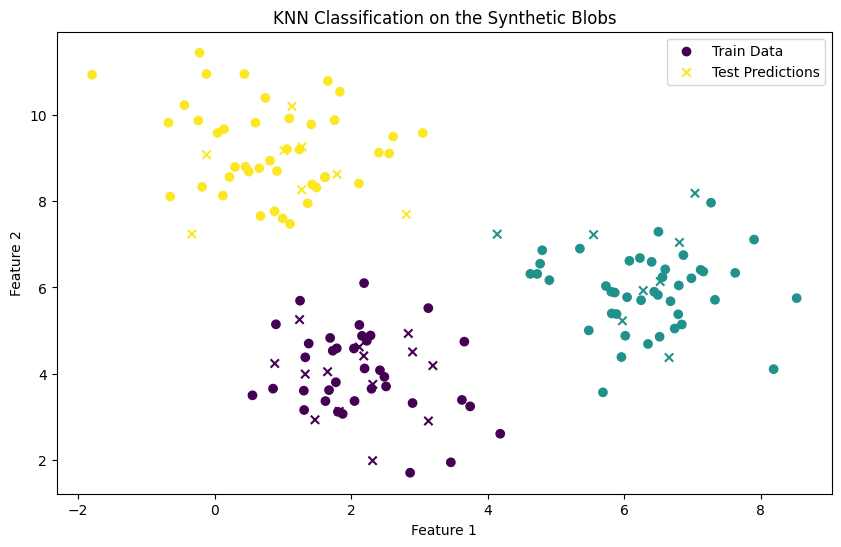

In [ ]:
# Data generation using make_blobs
blob_centroids = np.array([[2, 4], [6, 6], [1, 9]])  # Cluster centers
n_clusters = len(blob_centroids)

# Generating a stimulated dataset
X_syn, y_syn = make_blobs(n_samples=150, centers=blob_centroids, random_state=1)

# Constructing the dataset into 80-20 split
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
    X_syn, y_syn, train_size=0.8, random_state=12
)

# Using simulated data to train a KNN classifier
knn_synth = KNeighborsClassifier(n_neighbors=5)
knn_synth.fit(X_syn_train, y_syn_train)

# Making predictions for training and testing sets
y_syn_train_pred = knn_synth.predict(X_syn_train)
y_syn_test_pred = knn_synth.predict(X_syn_test)

# Computing and presenting accuracy ratings
acc_syn_train = accuracy_score(y_syn_train, y_syn_train_pred)
acc_syn_test = accuracy_score(y_syn_test, y_syn_test_pred)

print("\nSynthetic (make_blobs) Results:")
print(f"Accuracy of the training dataset: {acc_syn_train * 100:.2f}%")
print(f"Accuracy of the testing dataset: {acc_syn_test * 100:.2f}%")

# Making test predictions and training data plots
plt.figure(figsize=(10, 6))
plt.scatter(X_syn_train[:, 0], X_syn_train[:, 1], c=y_syn_train, marker='o', label='Train Data')
plt.scatter(X_syn_test[:, 0], X_syn_test[:, 1], c=y_syn_test_pred, marker='x', label='Test Predictions')
plt.title('KNN Classification on the Synthetic Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
